<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('data/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Number of (rows, columns) present in the data
df.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Find count of missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Descriptive Stats for food preparation time
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [69]:
# Find number of orders that are not rated
orders_not_rated = df[df['rating'] == 'Not given']['order_id'].count()

print(f'Total orders not rated: {orders_not_rated}')

Total orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

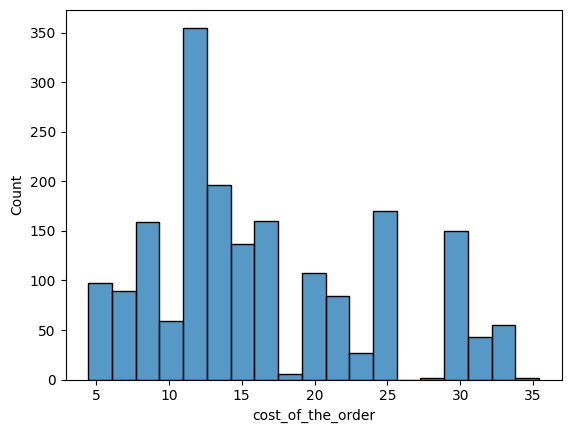

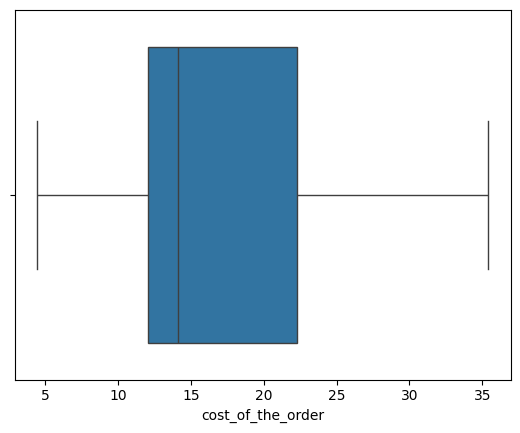

In [9]:
# Historgram of Cost of The Order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

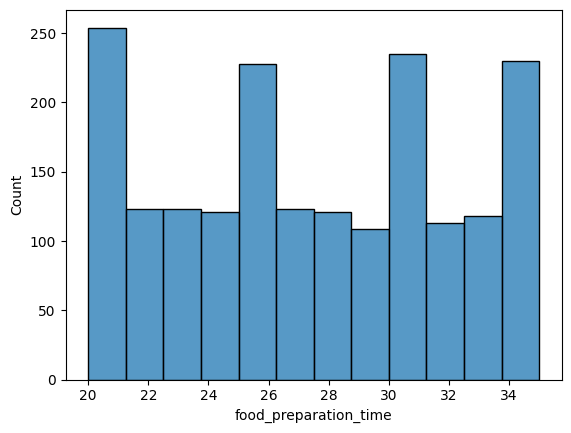

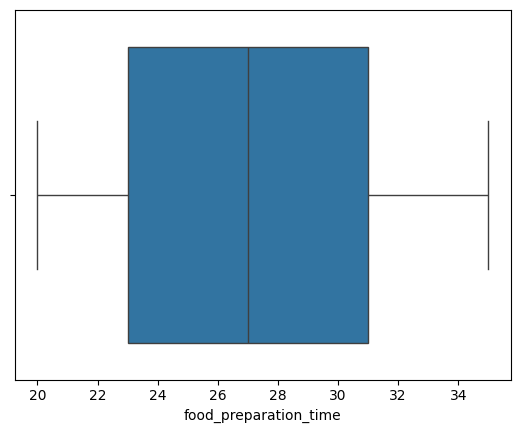

In [10]:
# Historgram of Food Preparation Time
sns.histplot(data=df,x='food_preparation_time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.show()


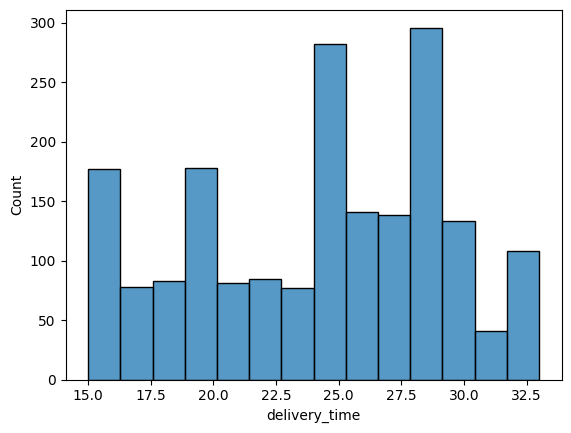

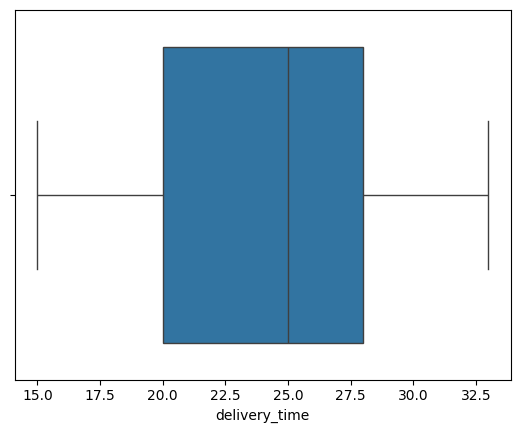

In [11]:
# Historgram of Delivery Time
sns.histplot(data=df,x='delivery_time')
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.show()

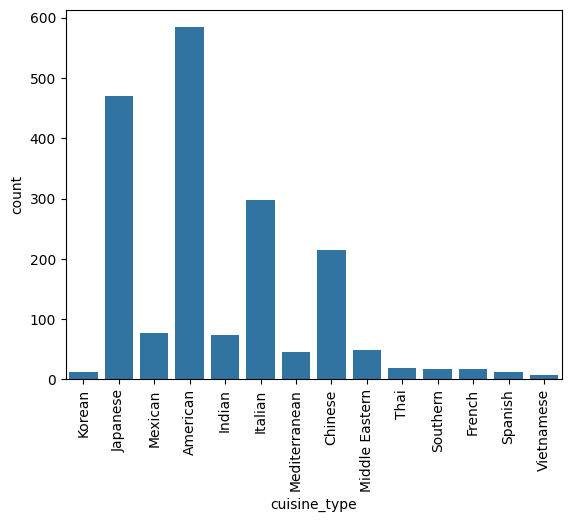

In [12]:
# Historgram of Cuisine Type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90);

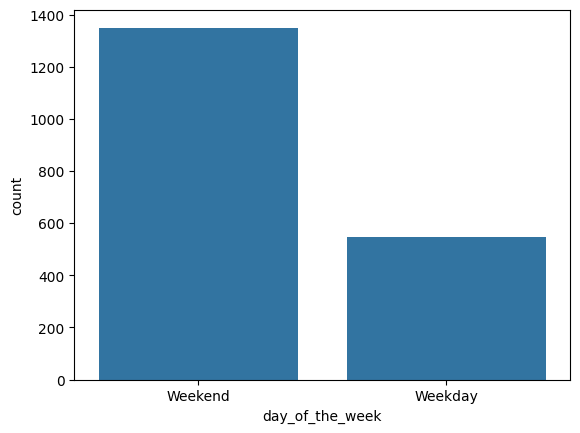

In [13]:
# Historgram of Day of the Week
sns.countplot(data=df,x='day_of_the_week');

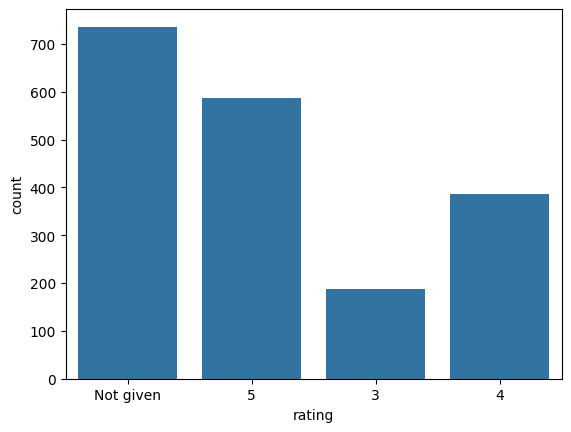

In [14]:
# Historgram of Rating
sns.countplot(data=df,x='rating');


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
# Top 5 Restaurant per # of Orders
top_restaurant = df['restaurant_name'].value_counts()

top_restaurant.head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
# Most Popular Cuisine on Weekends
top_weekend_cuisines = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

top_weekend_cuisines.head()

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [71]:
# Percentage of Orders Costing More Than 20 Dollars
all_orders = len(df['order_id'])

# Count number of Orders costing more than 20.00
orders_over_twenty = df[df['cost_of_the_order'] >= 20.00]['order_id'].count()

# Convert Orders over 20.00 into percentage
percent_orders_over_twenty = (orders_over_twenty / all_orders) * 100

print(f'Percentage of orders costing more than 20 dollars: {percent_orders_over_twenty}')


Percentage of orders costing more than 20 dollars: 29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [73]:
# Average of Order Delivery Time
mean_order_delivery = df['delivery_time'].mean()

print(f'Mean of order delivery time: {mean_order_delivery}')

Mean of order delivery time: 24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [19]:
# Find top 5 most frequent customers and grant 20% discount vouchers

# Count the number of orders for each customer
customer_orders = df.groupby('customer_id')['order_id'].count()  

# Find the top 5 customers with the most orders
top_customers = customer_orders.sort_values(ascending=False).head(5).index.tolist()

for customer in top_customers:
    df.loc[df['customer_id'] == customer, 'discount'] = 0.2

# Filter the DataFrame to show only the top 5 customers all of their orders
top_df = df[df['customer_id'].isin(top_customers)]

top_df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,discount
20,1478296,250494,Five Guys Burgers and Fries,American,24.20,Weekend,4,21,24,0.2
69,1477475,65009,Blue Ribbon Fried Chicken,American,32.93,Weekend,5,24,23,0.2
91,1477569,65009,Chote Nawab,Indian,16.15,Weekend,5,24,30,0.2
103,1476564,83287,Five Guys Burgers and Fries,American,24.30,Weekend,5,30,20,0.2
117,1476770,65009,Blue Ribbon Fried Chicken,American,7.86,Weekday,4,22,33,0.2
144,1478269,250494,The Meatball Shop,Italian,11.16,Weekday,5,22,28,0.2
195,1477004,250494,Five Guys Burgers and Fries,American,33.03,Weekend,5,29,15,0.2
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27,0.2
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23,0.2
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25,0.2


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [20]:
# Clean Ratings and Replace Non-Numeric Rating to NaN
new_df = pd.DataFrame(df)

# Replace value 'Not given' with NaN and Create new dataframe
new_df = new_df.replace('Not given', np.nan)

new_df['rating'] = pd.to_numeric(new_df['rating'], errors='coerce')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   discount               47 non-null     float64
dtypes: float64(3), int64(4), object(3)
memory usage: 148.4+ KB


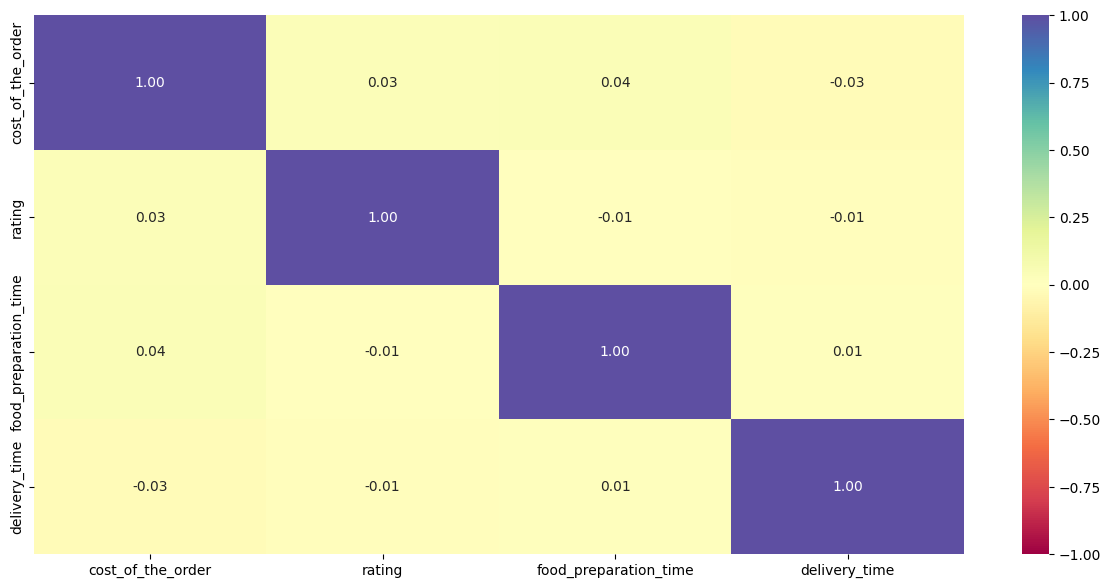

In [21]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','rating','food_preparation_time','delivery_time']

corr = new_df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

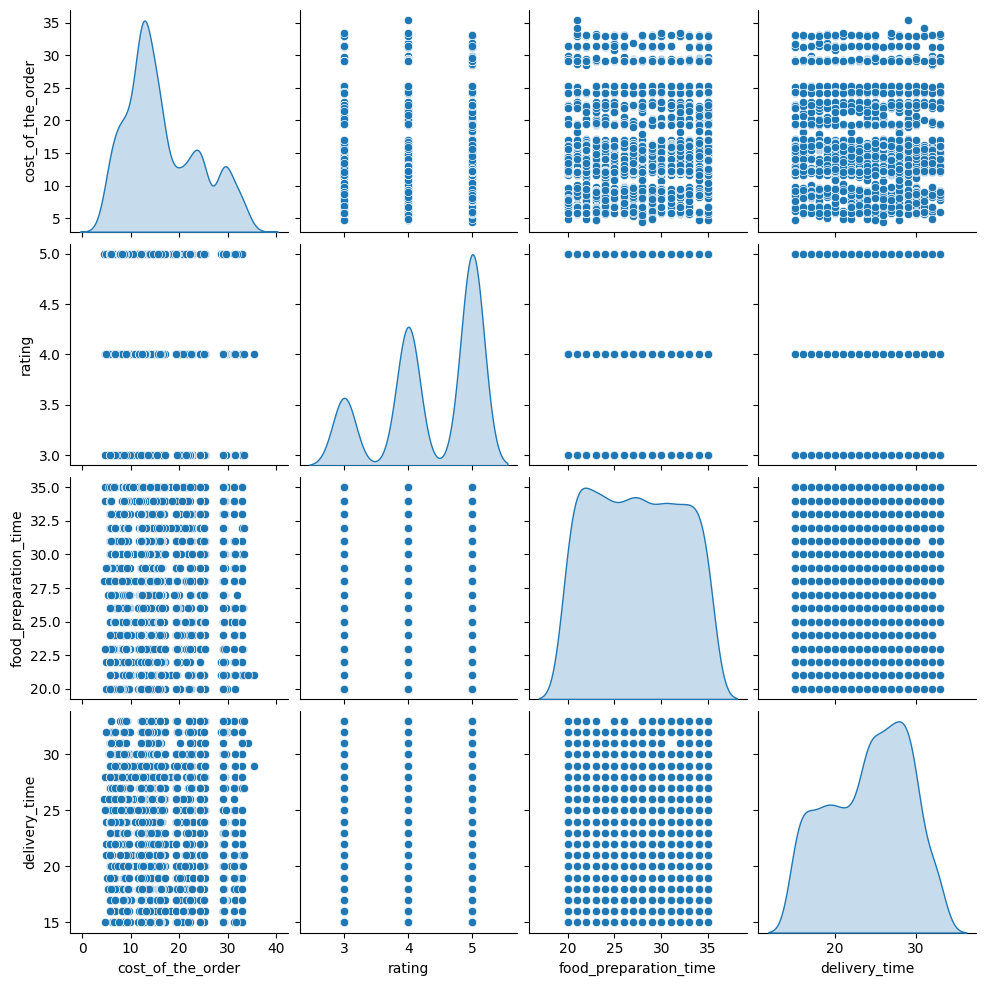

In [22]:
# Show pair plot for all numeric columns
sns.pairplot(data=new_df[num_var], diag_kind="kde")
plt.show()

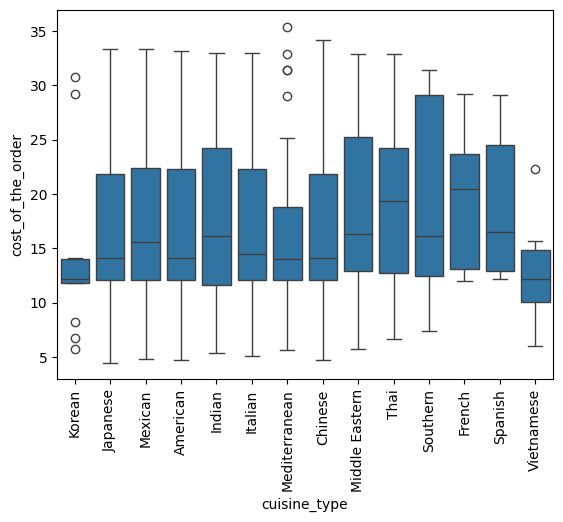

In [23]:
# Observation on Cost of orders per cuisine type
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') 
plt.xticks(rotation=90);

In [24]:
# Add 'food_preparation_time' and 'delivery_time' and store the result in a new DataFrame

new_df['total_order_time'] = new_df['food_preparation_time'] + new_df['delivery_time']

new_df


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,discount,total_order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,NaN,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,NaN,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,NaN,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,NaN,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,NaN,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,NaN,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19,NaN,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24,NaN,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5.0,23,31,NaN,54


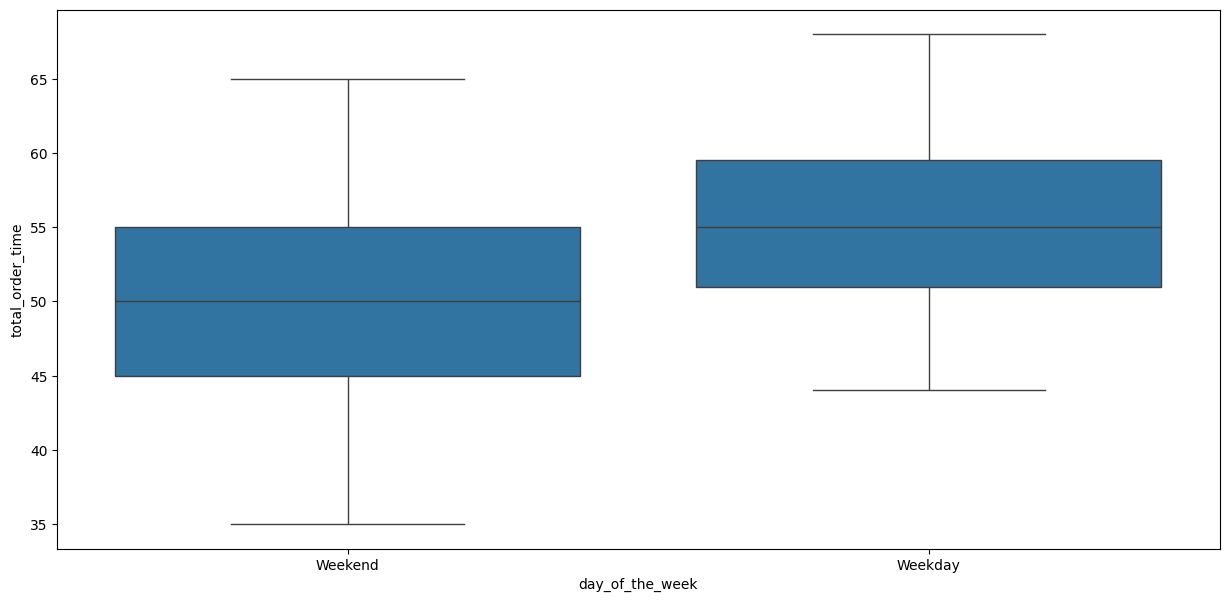

In [25]:
# Boxplot comparing total order times (combining food prep & delivery time) of the orders placed on weekends vs weekdays
plt.figure(figsize=(15,7))           
sns.boxplot(x=new_df['day_of_the_week'], y=new_df['total_order_time'])
plt.ylabel('total_order_time')
plt.xlabel('day_of_the_week')
plt.show()

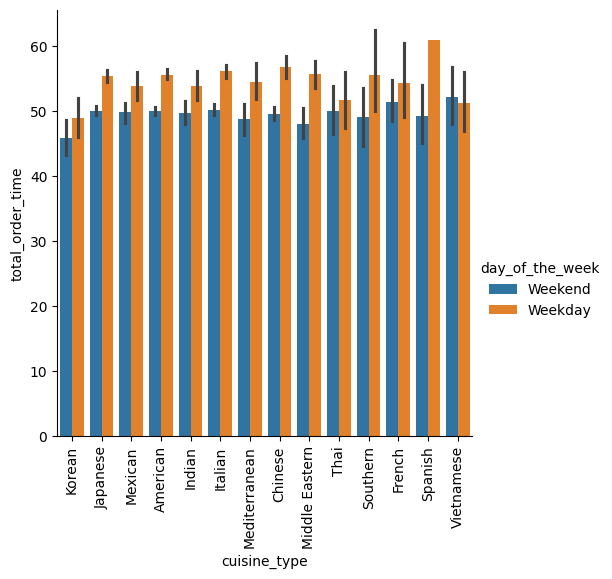

In [26]:
# Catplot comparing total order times of orders placed on weekends vs weekdays
sns.catplot(x='cuisine_type', y='total_order_time', data=new_df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Calculate the total ratings number per restaurant
rating_count = new_df.groupby('restaurant_name')['rating'].sum()

# Calculate the average rating per restaurant
average_rating = new_df.groupby('restaurant_name')['rating'].mean()

# Combined the total ratings and average rating into a new data frame named combined_data
combined_data = pd.concat([rating_count, average_rating], axis=1)

# Rename the columns
combined_data = combined_data.set_axis(['total_rating_count', 'average_rating'], axis=1)

# Filter for restaurants with high ratings greater than 50 AND high average rating greater than 4.0
top_rated_restaurant = combined_data[ (combined_data['total_rating_count'] >= 50) & (combined_data['average_rating'] >= 4.0) ]

top_rated_restaurant

,total_rating_count,average_rating
restaurant_name,,
Bareburger,69.0,4.058824
Blue Ribbon Fried Chicken,277.0,4.328125
Blue Ribbon Sushi,308.0,4.219178
Blue Ribbon Sushi Bar & Grill,101.0,4.590909
Blue Ribbon Sushi Izakaya,78.0,4.333333
Cafe Mogador,54.0,4.153846
Chipotle Mexican Grill $1.99 Delivery,63.0,4.200000
Five Guys Burgers and Fries,82.0,4.555556
Han Dynasty,102.0,4.434783


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [77]:
# Calculate the total revenue per restaurant
orders_over_twenty = df[df['cost_of_the_order'] >= 20.00]

orders_between_five_and_twenty = df[(df['cost_of_the_order'] >= 5.00) & (df['cost_of_the_order'] < 20.00)]

# Calculate the surcharge (25% of cost)
surcharge_one = orders_over_twenty['cost_of_the_order'] * 0.25

surcharge_two = orders_between_five_and_twenty['cost_of_the_order'] * 0.15

total_surcharge = surcharge_two.sum() + surcharge_two.sum()

print(f'Net revenue generated by the company across all orders: ${total_surcharge:.2f}')



Net revenue generated by the company across all orders: $4955.15


#### Observations:

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [28]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [29]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---